# Task-18 100DaysOfBytewiseML/DL - Fellowship

### K-Means Clustering for Customer Segmentation
## Task: 
#### Use K-Means clustering to segment customers in the Wholesale Customers dataset based on their annual spending in different categories. Visualize the clusters.


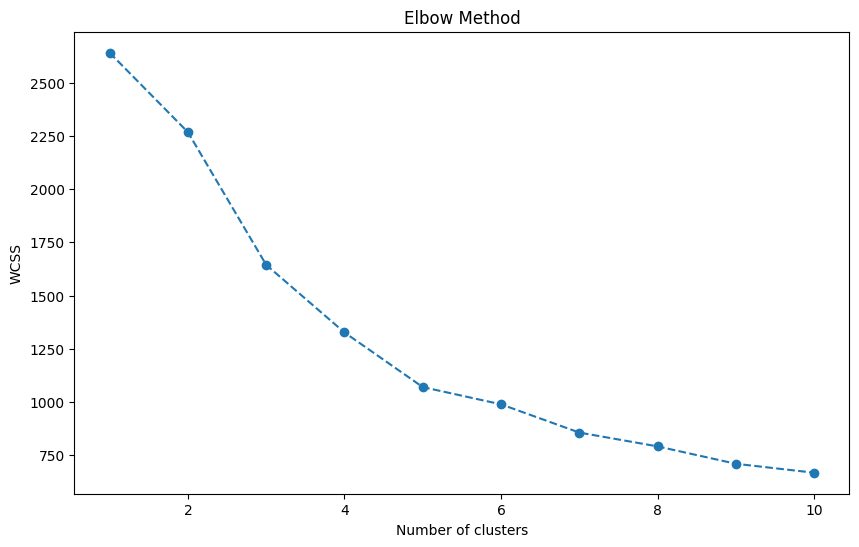

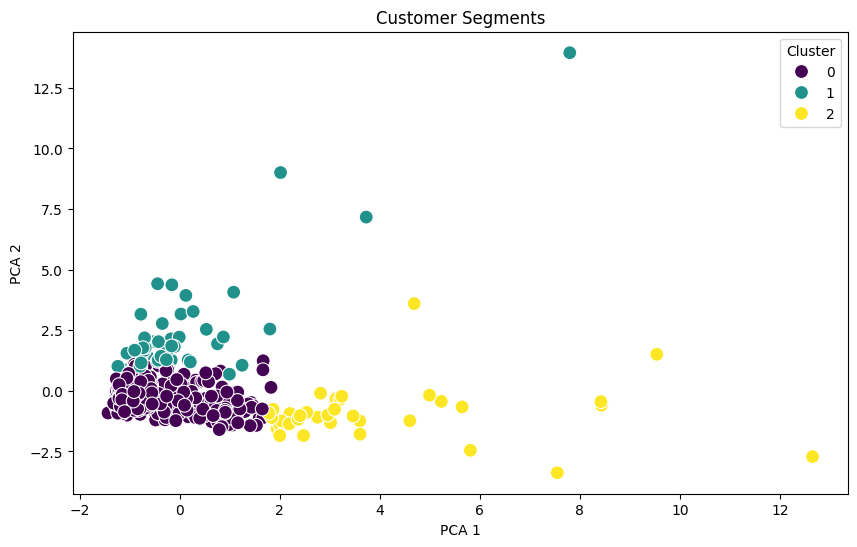

Cluster Centroids:
          Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8935.500000   4228.528571   5848.034286  2167.231429       1913.605714   
1  34540.113208   5860.358491   6122.622642  9841.735849        981.471698   
2   8704.864865  20534.405405  30466.243243  1932.621622      14758.837838   

    Delicassen  
0  1102.120000  
1  3664.245283  
2  2459.351351  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wholesale Customers dataset
# Make sure to adjust the file path if needed
data = pd.read_csv('Whole_sale_customers_data.csv')

# Select the features (annual spending in different categories)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow graph, let's assume the optimal number of clusters is 3 (you can change based on the graph)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Assign the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Analyze the cluster centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)
print('Cluster Centroids:')
print(centroids_df)


### Evaluating the Optimal Number of Clusters
## Task: 
#### Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. Visualize the results and justify your choice.


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Wholesale Customers dataset
data = pd.read_csv('Whole_sale_customers_data.csv')

# Select the features (annual spending in different categories)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


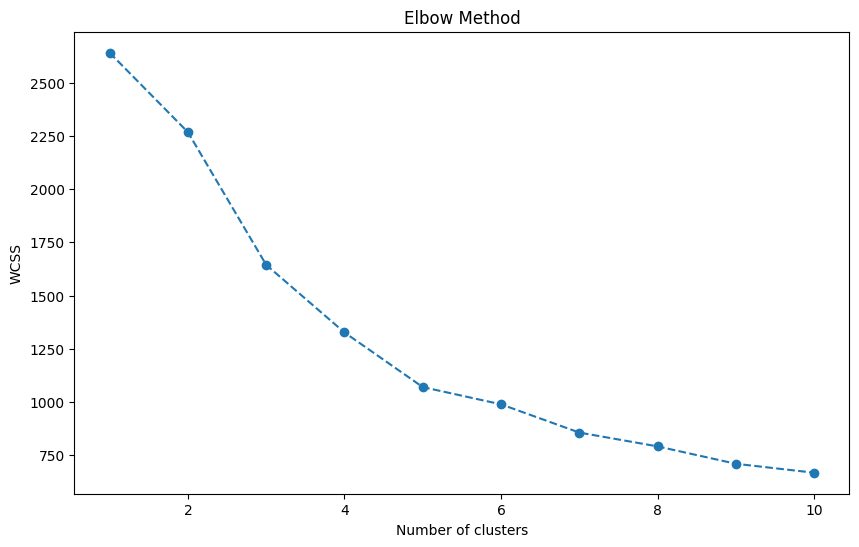

In [4]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


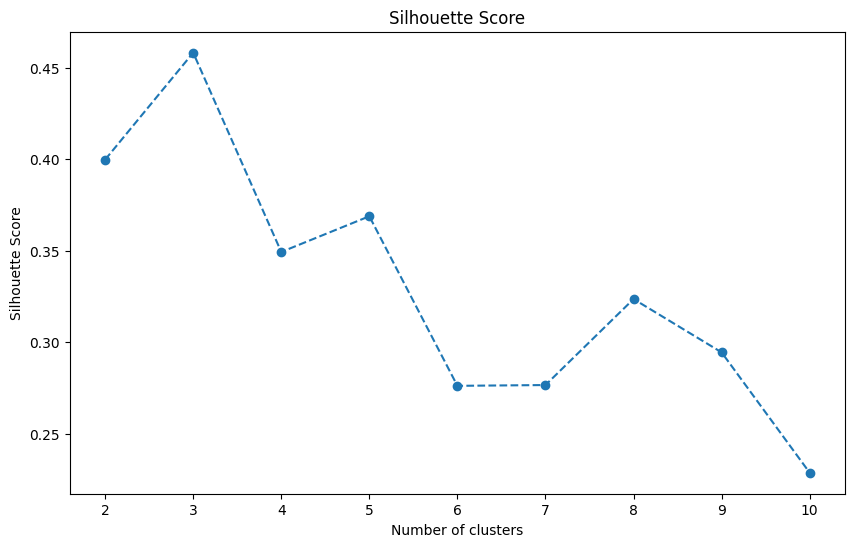

In [5]:
# Calculate the Silhouette Score for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Cluster Analysis and Interpretation
## Task: 
#### Interpret the clusters formed in the Wholesale Customers dataset. Identify the characteristics and differences among the clusters based on spending behavior.


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Whole_sale_customers_data.csv')

# Select relevant features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
n_clusters = 3  # Choose optimal clusters from previous analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)

print("Cluster Centroids:")
print(centroid_df)

# Cluster Interpretation
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Centroids:
          Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8935.500000   4228.528571   5848.034286  2167.231429       1913.605714   
1  34540.113208   5860.358491   6122.622642  9841.735849        981.471698   
2   8704.864865  20534.405405  30466.243243  1932.621622      14758.837838   

    Delicassen  
0  1102.120000  
1  3664.245283  
2  2459.351351  

Cluster Summary:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  


### Hierarchical Clustering: Dendrogram and Cluster Formation
## Task: 
#### Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.

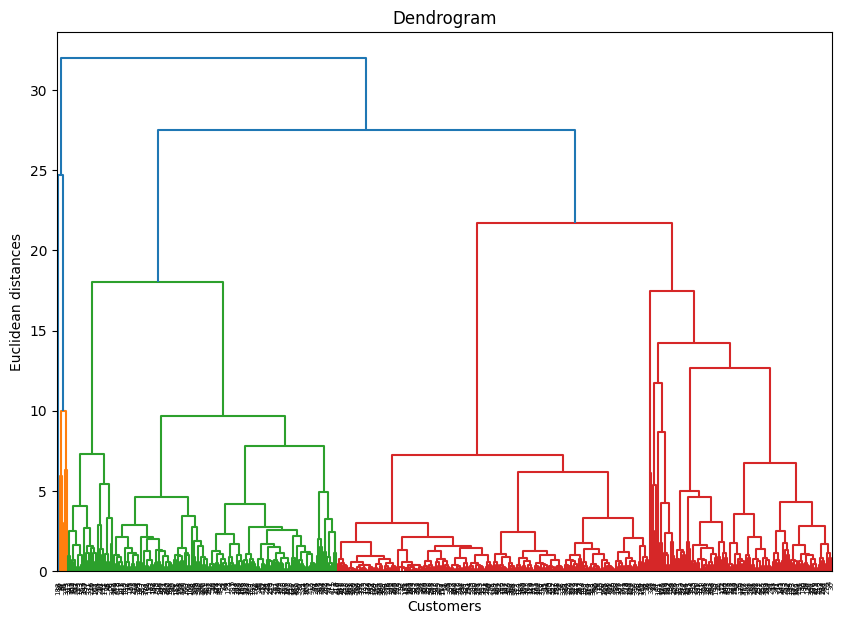


Cluster Comparison:
Hierarchical  0    1    2
K-Means                  
0             0  230  120
1             1   50    2
2             5    1   31


In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X_scaled)

# Compare K-Means and Hierarchical Clusters
comparison = pd.crosstab(data['Cluster'], data['HC_Cluster'], rownames=['K-Means'], colnames=['Hierarchical'])
print("\nCluster Comparison:")
print(comparison)



### Comparison of Clustering Results
## Task: 
#### Compare the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset. Discuss the results in terms of cluster cohesion and separation.


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Whole_sale_customers_data.csv')

# Select relevant features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
n_clusters = 3  # You may adjust this based on prior analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X_scaled)

# Verify that 'HC_Cluster' was created
if 'HC_Cluster' in data.columns:
    # Silhouette Score for K-Means
    kmeans_silhouette = silhouette_score(X_scaled, data['Cluster'])
    print(f"K-Means Silhouette Score: {kmeans_silhouette}")

    # Silhouette Score for Hierarchical Clustering
    hc_silhouette = silhouette_score(X_scaled, data['HC_Cluster'])
    print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette}")
else:
    print("Error: 'HC_Cluster' column was not created. Please check the hierarchical clustering step.")


K-Means Silhouette Score: 0.4582633767207058
Hierarchical Clustering Silhouette Score: 0.2646091480214908
